In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
import os
import seaborn as sns

In [2]:
path='c:individual_stocks_5yr'
company_list=['AAL_data.csv', 'AAPL_data.csv', 'AAP_data.csv', 'ABBV_data.csv', 'ABC_data.csv', 'ABT_data.csv', 'ACN_data.csv', 'ADBE_data.csv', 'ADI_data.csv',
       'ADM_data.csv', 'ADP_data.csv', 'ADSK_data.csv', 'ADS_data.csv', 'AEE_data.csv', 'AEP_data.csv', 'AES_data.csv', 'AET_data.csv', 'AFL_data.csv',
       'AGN_data.csv', 'AIG_data.csv', 'AIV_data.csv', 'AIZ_data.csv', 'AJG_data.csv', 'AKAM_data.csv', 'ALB_data.csv' ]
#blank dataframe
data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    data = pd.concat([data, current_df])
    
data.shape



(31475, 7)

In [3]:
data.to_csv('c:all_data',index=False)
data.shape

(31475, 7)

In [4]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
data['date']=pd.to_datetime(data['date'])
data['date'][0]

0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [6]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31475 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31475 non-null  datetime64[ns]
 1   open    31475 non-null  float64       
 2   high    31475 non-null  float64       
 3   low     31475 non-null  float64       
 4   close   31475 non-null  float64       
 5   volume  31475 non-null  int64         
 6   Name    31475 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.4+ MB


In [8]:
tech_list = data['Name'].unique()
tech_list

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB'], dtype=object)

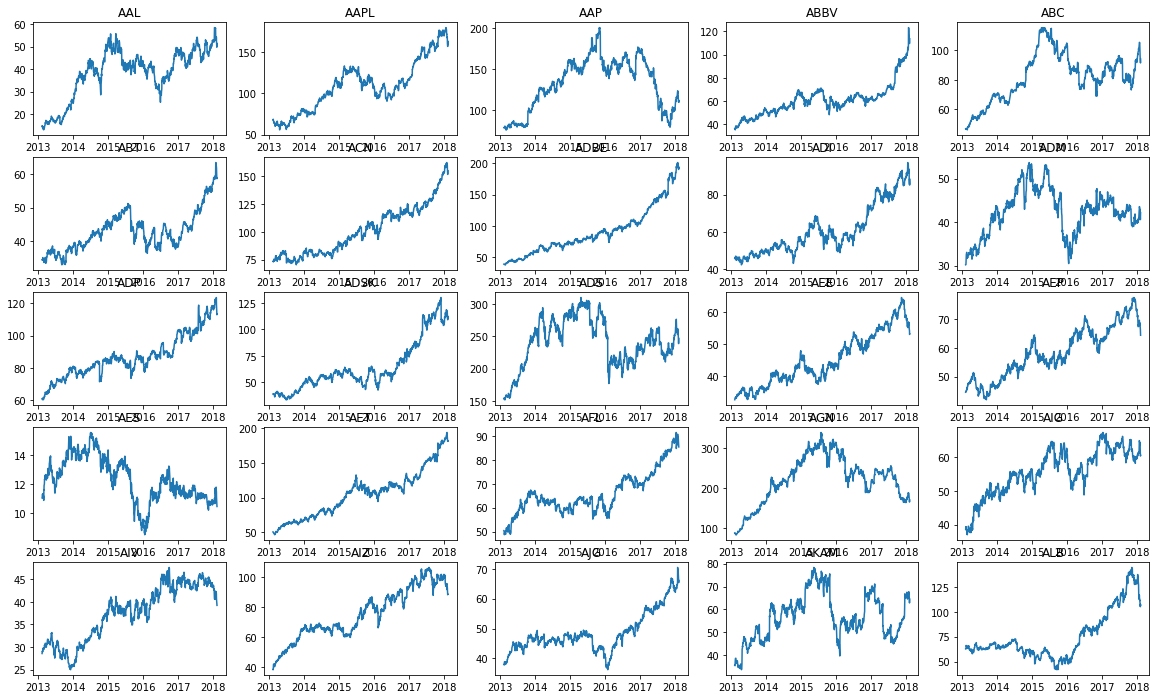

In [9]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(5,5 , i)
    df=data[data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

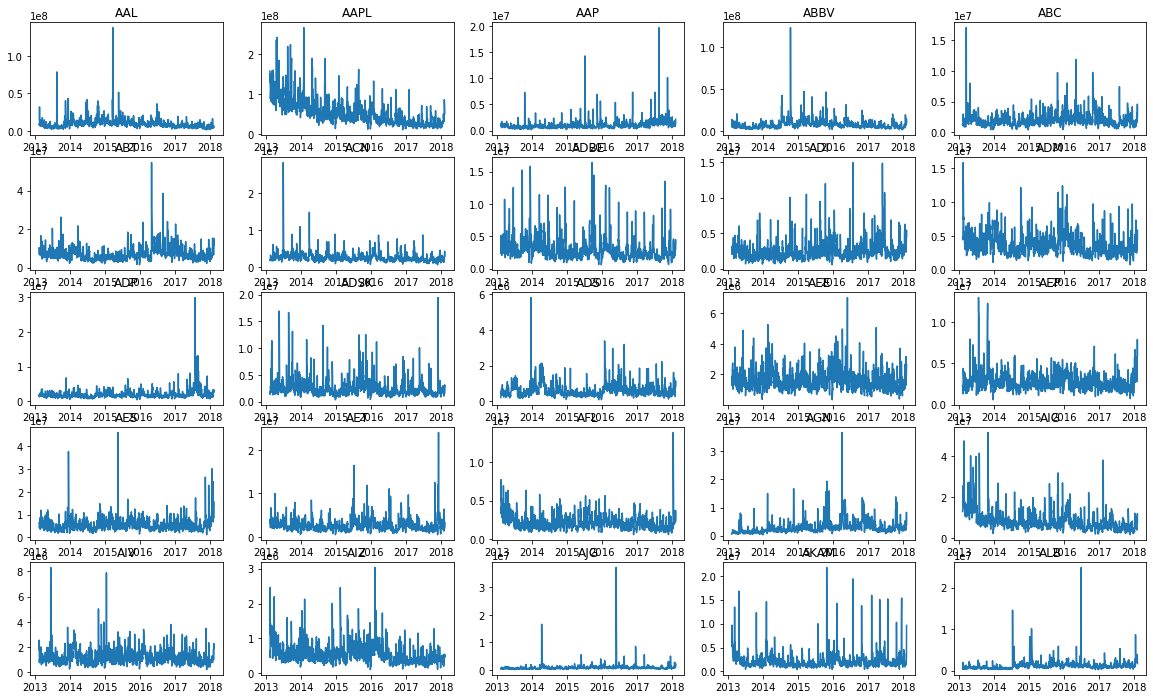

In [10]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(5, 5, i)
    df=data[data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title("Analyse the total volume of stock being traded each day")
    plt.title(company)

In [11]:
data['1day % return']=((data['close']-data['open'])/data['close'])*100
print(" Analyse Daily price change in stock")
data.head()

 Analyse Daily price change in stock


,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.169492
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.973721
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.261388
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.455662
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.790565


<AxesSubplot:>

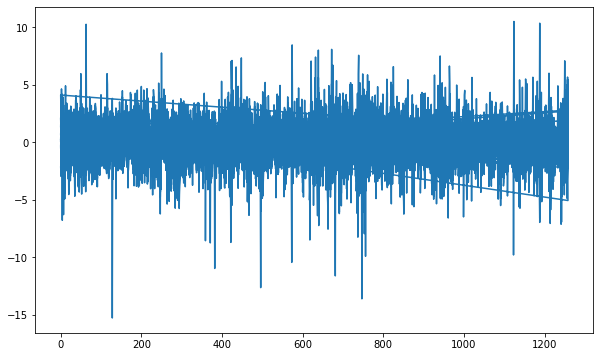

In [12]:
plt.figure(figsize=(10,6))
data['1day % return'].plot()

In [13]:
data1=df.copy()

In [14]:
data1['date']=pd.to_datetime(data1['date'])

In [15]:
data1=data1.set_index('date')

In [16]:
data1.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,61.78,63.02,61.7800,62.66,422698,ALB
2013-02-11,62.68,62.94,62.3960,62.76,428135,ALB
2013-02-12,62.45,62.94,62.2700,62.70,376294,ALB
2013-02-13,64.05,66.83,64.0500,66.15,1949005,ALB
2013-02-14,65.85,65.99,65.2803,65.41,585215,ALB


 Analyse monthly mean of close column


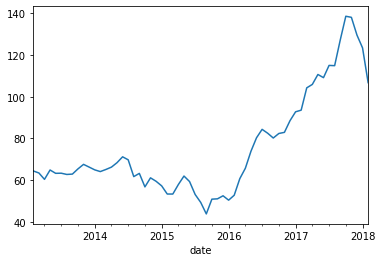

In [17]:
data1['close'].resample('M').mean().plot()
print(" Analyse monthly mean of close column")

Resampling close column year wise


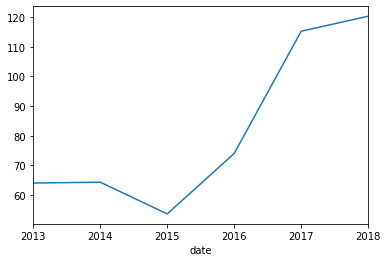

In [18]:
data1['close'].resample('Y').mean().plot()
print("Resampling close column year wise")

In [19]:
aapl=pd.read_csv('c:individual_stocks_5yr/AAPL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [20]:
goog=pd.read_csv('c:individual_stocks_5yr/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [21]:
amzn=pd.read_csv('c:individual_stocks_5yr/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [22]:
msft=pd.read_csv('c:individual_stocks_5yr/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [23]:
### create a blank dataframe
close=pd.DataFrame()

In [24]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [25]:
close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


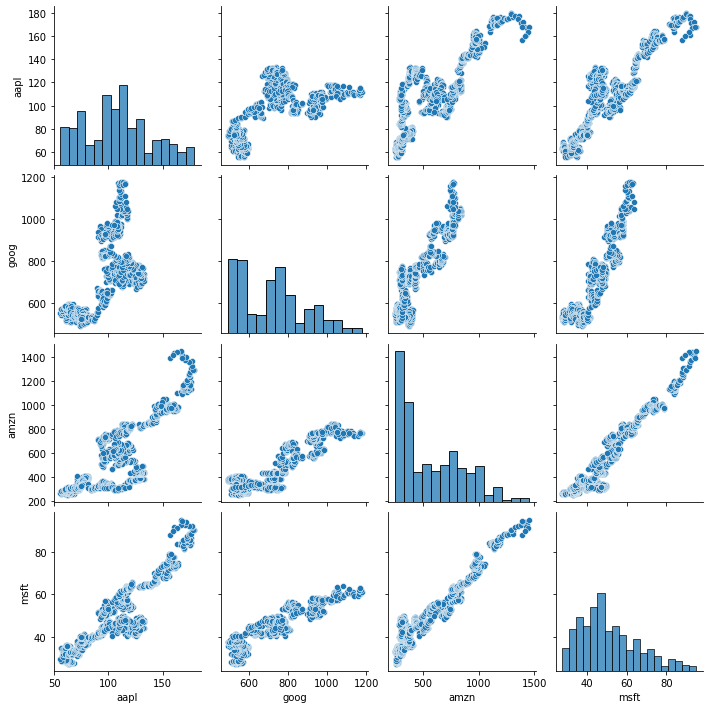

In [26]:
sns.pairplot(data=close)

<AxesSubplot:>

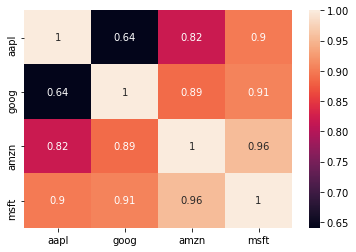

In [27]:
sns.heatmap(close.corr(),annot=True)

# Closing price of Google and Microsoft are well correlated and Closing price of Amazon and Microsoft have a co-relation of 0.96

In [28]:
data1=pd.DataFrame()

In [29]:
data1['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data1['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data1['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data1['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [30]:
data1.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


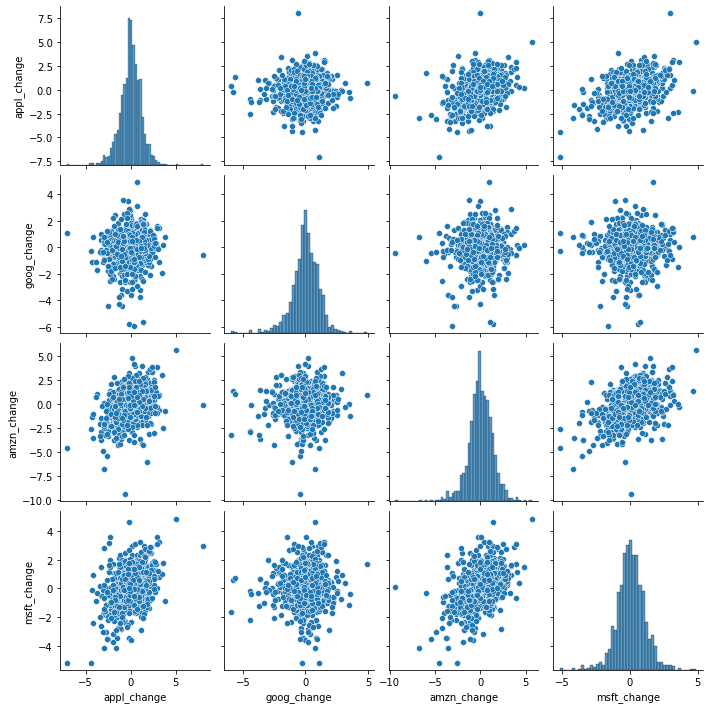

In [31]:
sns.pairplot(data=data1)

<AxesSubplot:>

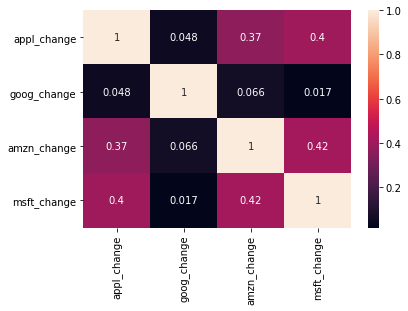

In [32]:
sns.heatmap(data1.corr(),annot=True)

<AxesSubplot:xlabel='appl_change', ylabel='Density'>

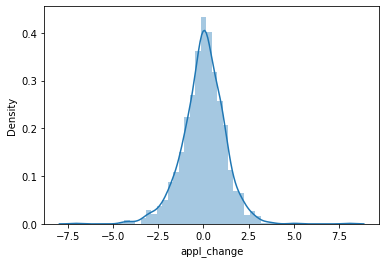

In [33]:
sns.distplot(data1['appl_change'])

In [34]:
data1['appl_change'].std()

1.1871377131421237

1.4246644227944307 means that 90% of the times the worst daily Loss will not exceed 1.42

In [35]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
